Example 1: Basic case with varying magnitudes


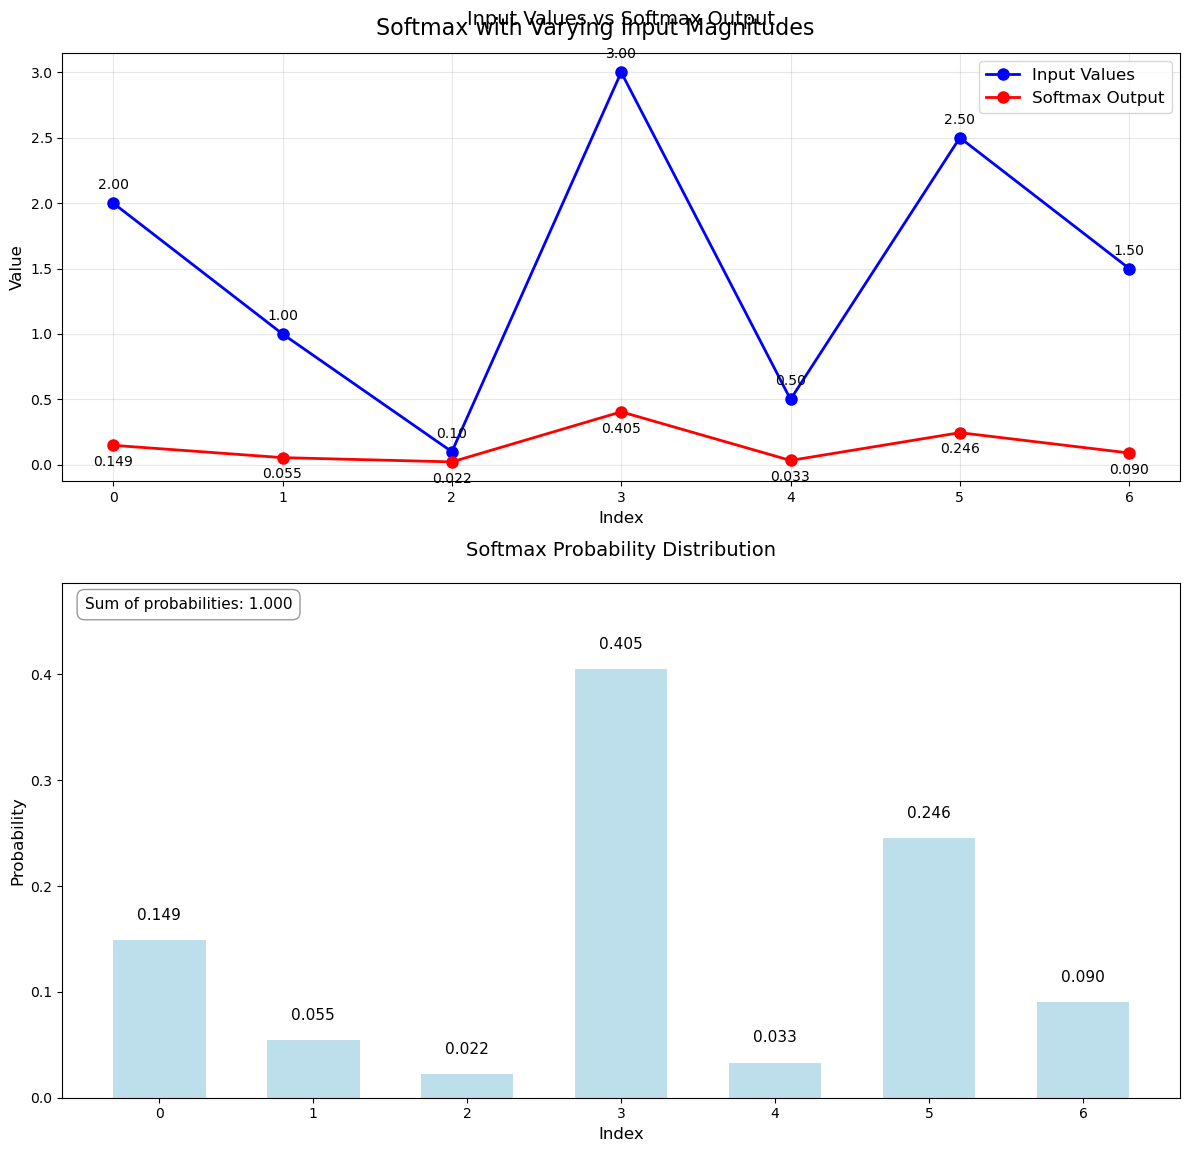


Example 2: Extreme values to demonstrate scaling property


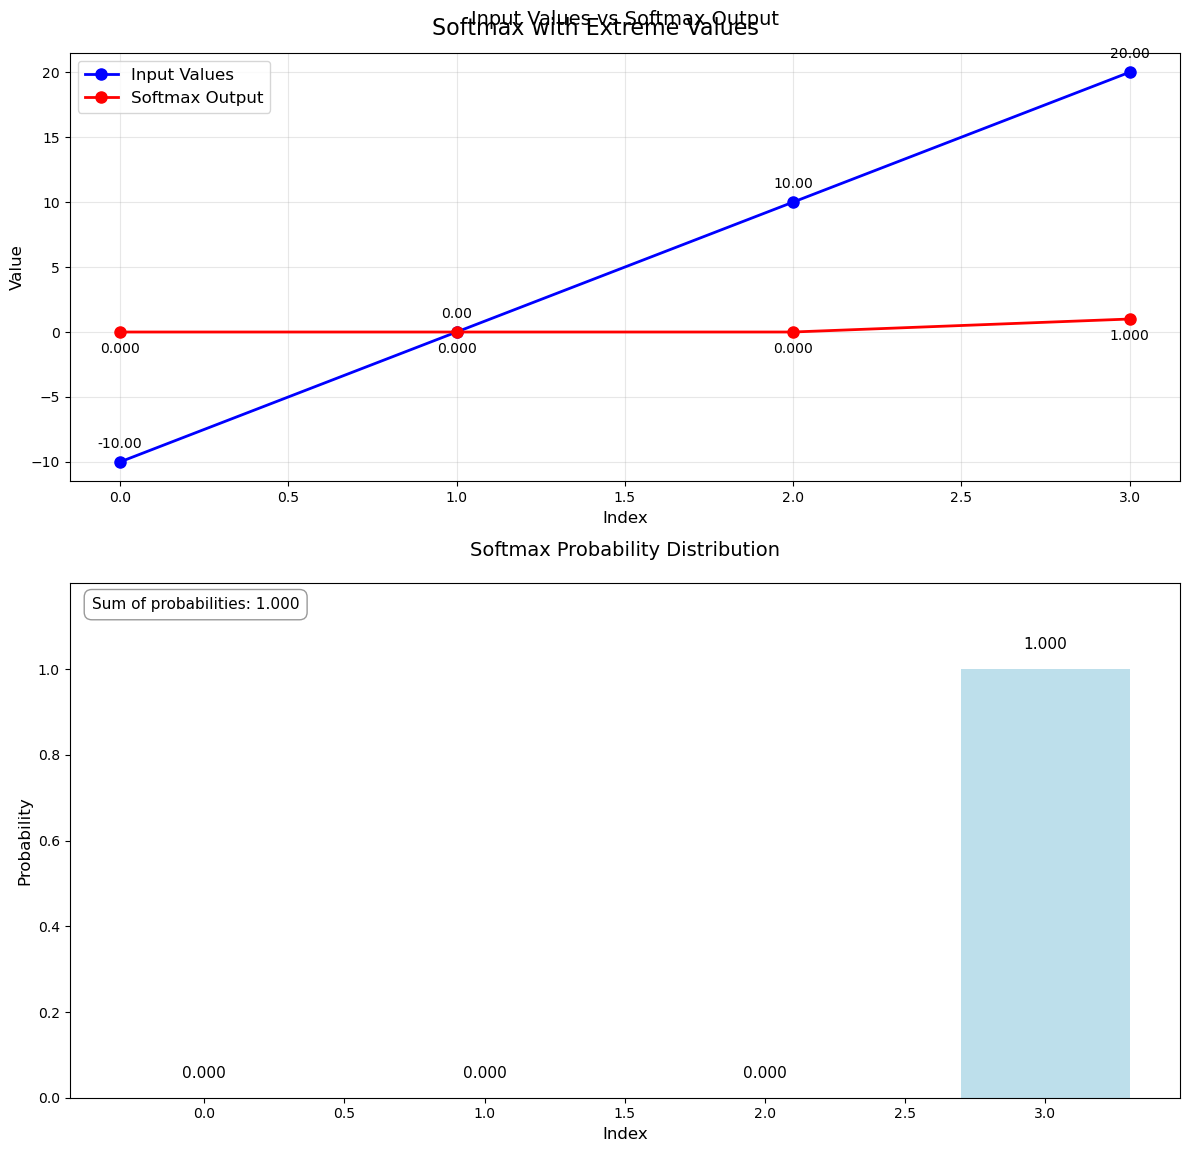


Example 3: Similar values to show subtle differences


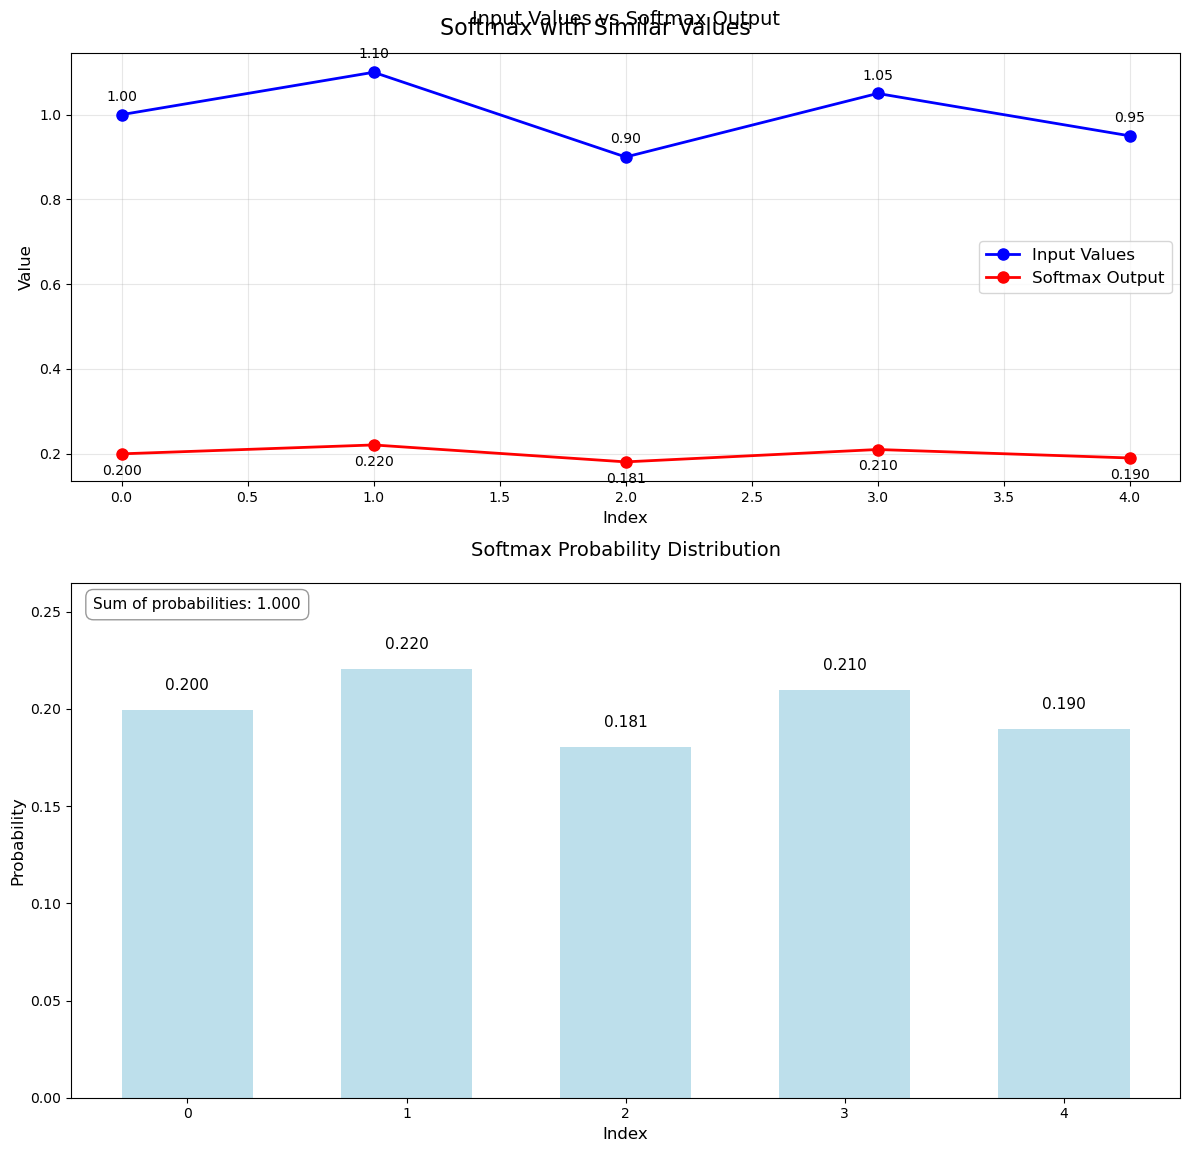


Example 1 details:

Input values: [2.  1.  0.1 3.  0.5 2.5 1.5]
Softmax outputs: [0.14894003 0.05479197 0.02227675 0.40486094 0.03323301 0.24556057
 0.09033669]
Sum of softmax outputs: 1.0

Example 2 details:

Input values: [-10.   0.  10.  20.]
Softmax outputs: [9.357198e-14 2.061060e-09 4.539787e-05 9.999546e-01]
Sum of softmax outputs: 1.0

Example 3 details:

Input values: [1.   1.1  0.9  1.05 0.95]
Softmax outputs: [0.1995009  0.2204826  0.18051589 0.20972952 0.18977113]
Sum of softmax outputs: 1.0


In [13]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def plot_softmax_comparison(input_values, title="Softmax Function Visualization"):
    # Convert input to tensor
    input_tensor = torch.tensor(input_values, dtype=torch.float32)
    
    # Apply softmax
    softmax_output = F.softmax(input_tensor, dim=0)
    
    # Create figure with two subplots, with more vertical space between them
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), height_ratios=[1, 1.2])
    fig.subplots_adjust(hspace=0.3)  # Increase space between subplots
    fig.suptitle(title, fontsize=16, y=0.95)
    
    # Plot 1: Line plot comparing input vs softmax
    ax1.plot(input_tensor.numpy(), 'bo-', label='Input Values', linewidth=2, markersize=8)
    ax1.plot(softmax_output.numpy(), 'ro-', label='Softmax Output', linewidth=2, markersize=8)
    ax1.set_xlabel('Index', fontsize=12)
    ax1.set_ylabel('Value', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12)
    ax1.set_title('Input Values vs Softmax Output', fontsize=14, pad=20)
    
    # Add value annotations for both lines
    for i, (input_val, softmax_val) in enumerate(zip(input_tensor.numpy(), softmax_output.numpy())):
        ax1.annotate(f'{input_val:.2f}', 
                    (i, input_val), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center',
                    fontsize=10)
        ax1.annotate(f'{softmax_val:.3f}', 
                    (i, softmax_val), 
                    textcoords="offset points", 
                    xytext=(0,-15), 
                    ha='center',
                    fontsize=10)
    
    # Plot 2: Bar plot of softmax probabilities with adjusted height
    max_softmax = softmax_output.max().item()
    y_margin = max_softmax * 0.2  # 20% margin for annotations
    
    bars = ax2.bar(range(len(softmax_output)), 
                   softmax_output.numpy(),
                   color='lightblue',
                   alpha=0.8,
                   width=0.6)  # Make bars slightly narrower
    
    ax2.set_xlabel('Index', fontsize=12)
    ax2.set_ylabel('Probability', fontsize=12)
    ax2.set_title('Softmax Probability Distribution', fontsize=14, pad=20)
    
    # Set y-axis limit with margin for annotations
    ax2.set_ylim(0, max_softmax + y_margin)
    
    # Add value labels on bars with better positioning
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2.,
                height + (y_margin * 0.2),  # Position annotations just above bars
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=11)
    
    # Add sum annotation with better positioning and formatting
    total_sum = softmax_output.sum().item()
    ax2.text(0.02, 0.95, f'Sum of probabilities: {total_sum:.3f}',
             transform=ax2.transAxes,
             bbox=dict(facecolor='white', 
                      alpha=0.8,
                      edgecolor='gray',
                      boxstyle='round,pad=0.5'),
             fontsize=11)
    
    plt.tight_layout()
    return fig

# Example 1: Basic case with varying magnitudes
print("Example 1: Basic case with varying magnitudes")
input_values1 = [2.0, 1.0, 0.1, 3.0, 0.5, 2.5, 1.5]
fig1 = plot_softmax_comparison(input_values1, "Softmax with Varying Input Magnitudes")
plt.show()

# Example 2: Extreme values to show scaling property
print("\nExample 2: Extreme values to demonstrate scaling property")
input_values2 = [-10.0, 0.0, 10.0, 20.0]
fig2 = plot_softmax_comparison(input_values2, "Softmax with Extreme Values")
plt.show()

# Example 3: Similar values to show subtle differences
print("\nExample 3: Similar values to show subtle differences")
input_values3 = [1.0, 1.1, 0.9, 1.05, 0.95]
fig3 = plot_softmax_comparison(input_values3, "Softmax with Similar Values")
plt.show()

# Print numerical values for comparison
def print_softmax_details(input_values):
    input_tensor = torch.tensor(input_values, dtype=torch.float32)
    softmax_output = F.softmax(input_tensor, dim=0)
    print("\nInput values:", input_tensor.numpy())
    print("Softmax outputs:", softmax_output.numpy())
    print("Sum of softmax outputs:", softmax_output.sum().item())

for i, values in enumerate([input_values1, input_values2, input_values3], 1):
    print(f"\nExample {i} details:")
    print_softmax_details(values)


Example 1: Regular input values


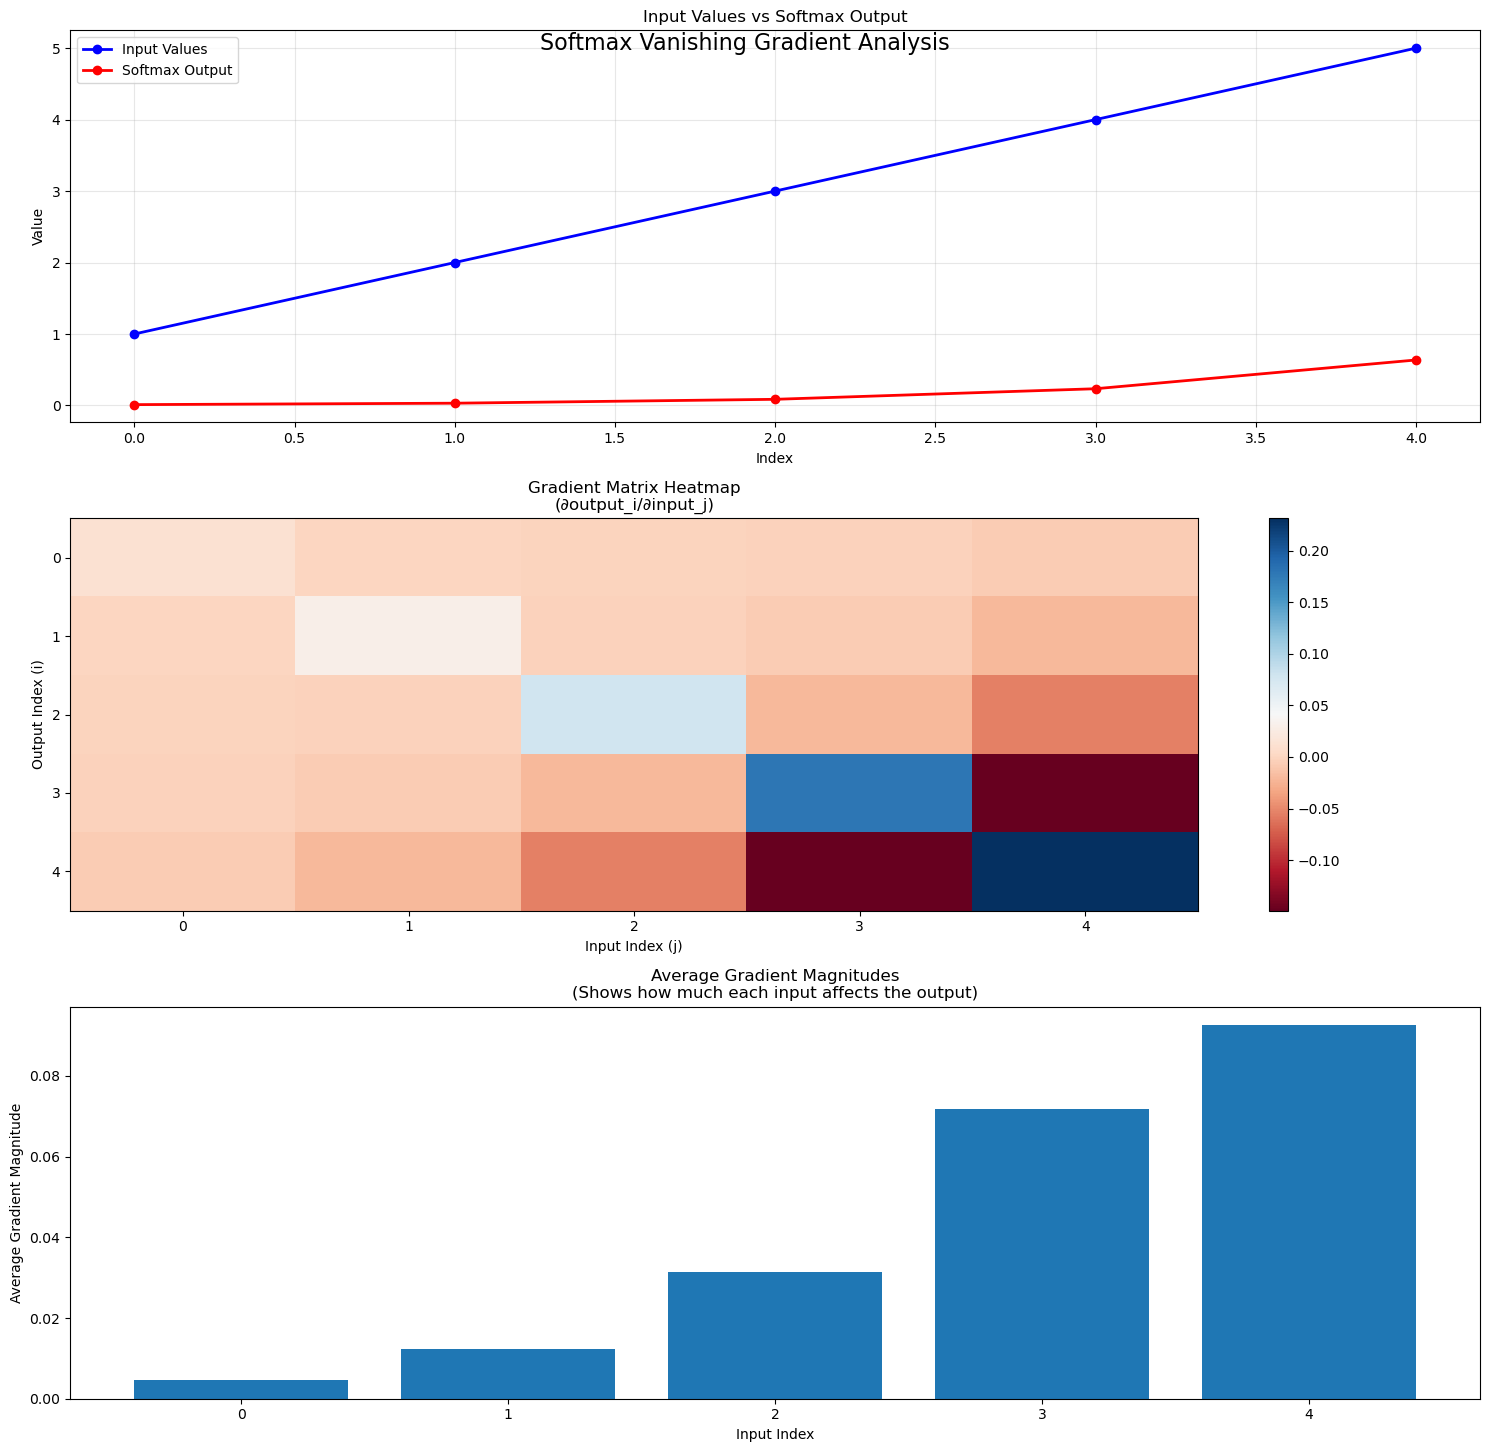


Example 2: Extreme input values (showing vanishing gradient)


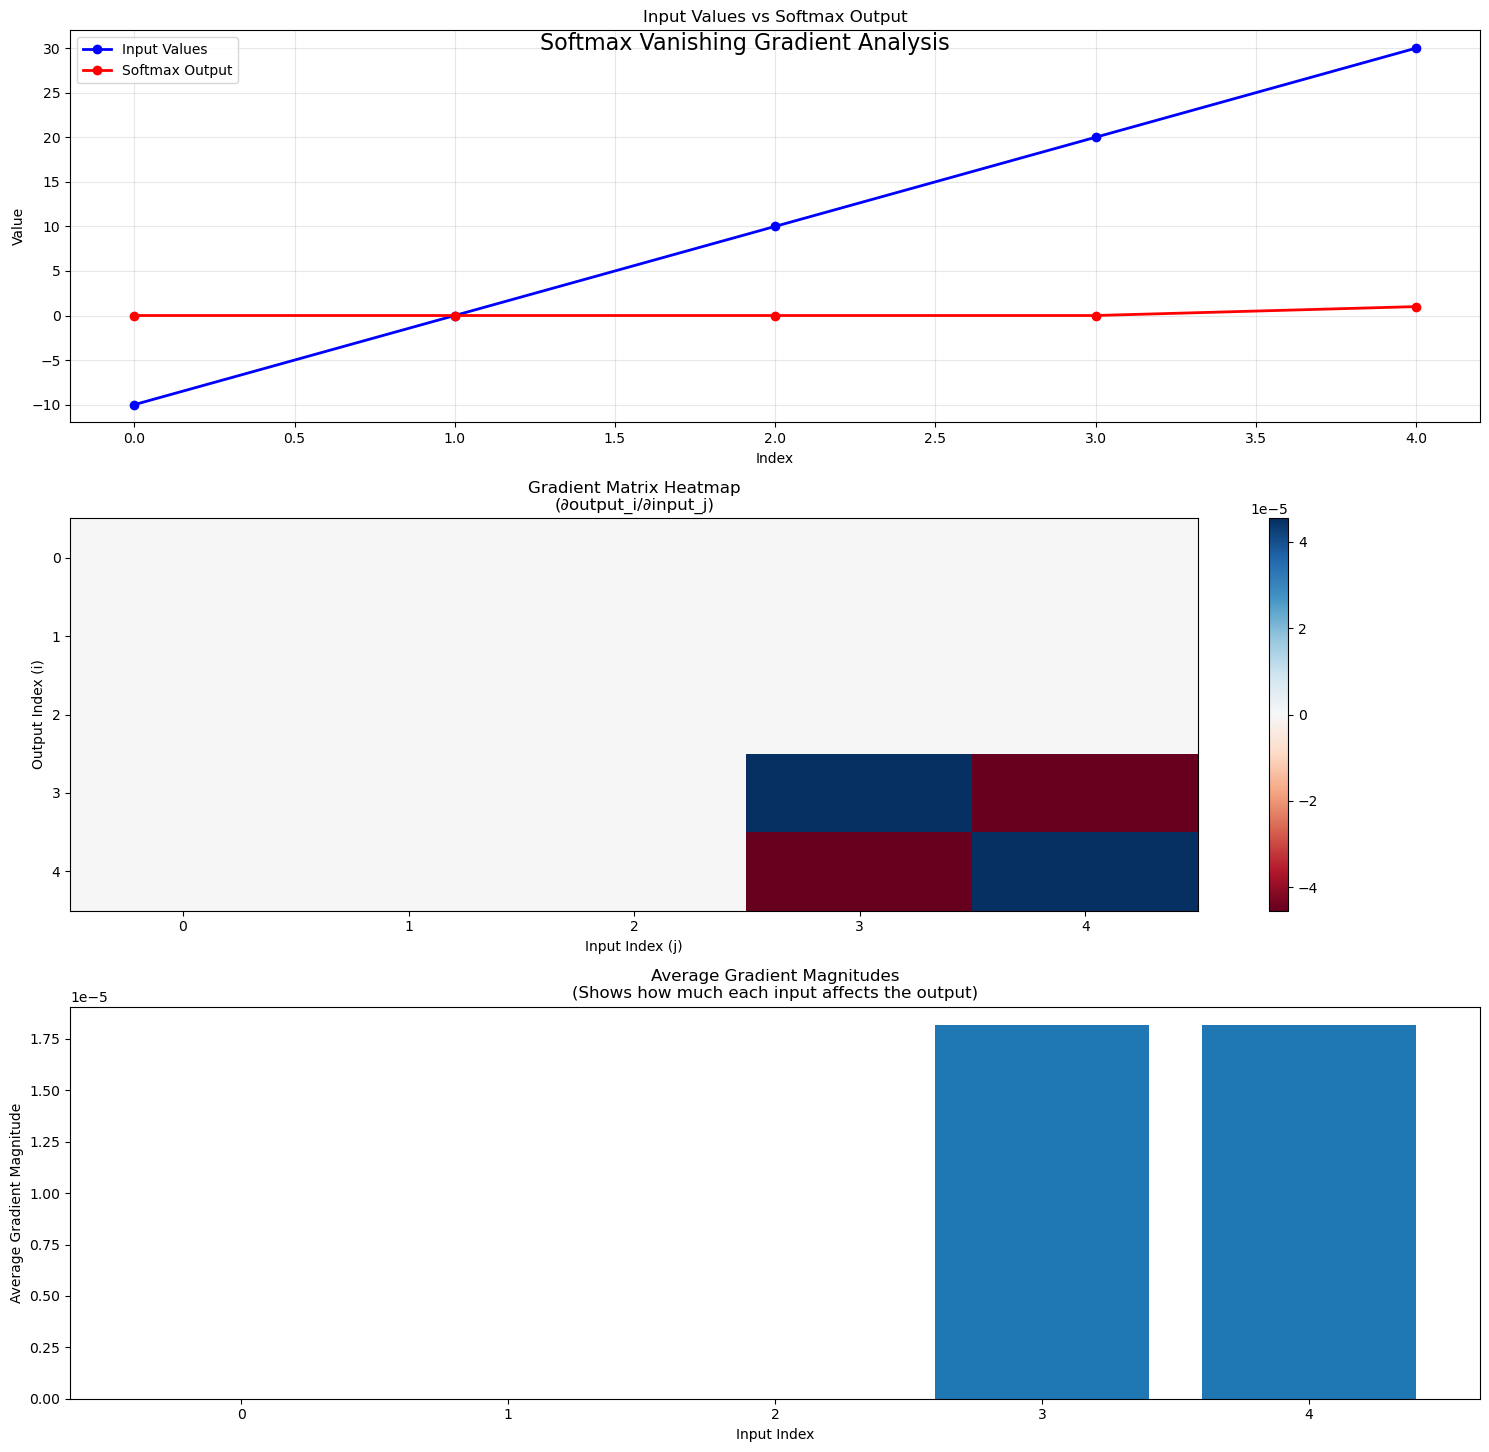


Analysis for regular values:

Input values: [1. 2. 3. 4. 5.]
Softmax outputs: [0.0117 0.0317 0.0861 0.2341 0.6364]
Average gradient magnitudes: [0.0046 0.0123 0.0315 0.0717 0.0926]
Maximum gradient: 0.2314
Minimum gradient: 0.0004
Gradient ratio (max/min): 626.5256

Analysis for extreme values:

Input values: [-10.   0.  10.  20.  30.]
Softmax outputs: [0. 0. 0. 0. 1.]
Average gradient magnitudes: [0. 0. 0. 0. 0.]
Maximum gradient: 0.0000
Minimum gradient: 0.0000
Gradient ratio (max/min): 114253248281197449362538496.0000


In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def compute_softmax_gradient(input_values):
    """
    Compute the Jacobian matrix of softmax function.
    For softmax, the gradient for the i-th element with respect to j-th input is:
    ∂S_i/∂x_j = S_i(δ_ij - S_j), where δ_ij is the Kronecker delta
    """
    # Convert to tensor and enable gradient tracking
    x = torch.tensor(input_values, dtype=torch.float32, requires_grad=True)
    softmax_output = F.softmax(x, dim=0)
    
    # Computing Jacobian matrix
    jacobian = torch.zeros((len(x), len(x)))
    for i in range(len(x)):
        # Zero out previous gradients
        if x.grad is not None:
            x.grad.zero_()
        
        # Compute gradient for each output with respect to all inputs
        softmax_output[i].backward(retain_graph=True)
        jacobian[i] = x.grad.data
    
    return softmax_output.detach().numpy(), jacobian.numpy()

def plot_softmax_and_gradients(input_values):
    """
    Create a visualization showing softmax outputs and their gradients
    to demonstrate the vanishing gradient problem.
    """
    softmax_output, jacobian = compute_softmax_gradient(input_values)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))
    fig.suptitle('Softmax Vanishing Gradient Analysis', fontsize=16, y=0.95)
    
    # Plot 1: Input vs Softmax Output
    ax1.plot(input_values, 'bo-', label='Input Values', linewidth=2)
    ax1.plot(softmax_output, 'ro-', label='Softmax Output', linewidth=2)
    ax1.set_title('Input Values vs Softmax Output')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Gradient Heatmap
    im = ax2.imshow(jacobian, cmap='RdBu', aspect='auto')
    ax2.set_title('Gradient Matrix Heatmap\n(∂output_i/∂input_j)')
    ax2.set_xlabel('Input Index (j)')
    ax2.set_ylabel('Output Index (i)')
    plt.colorbar(im, ax=ax2)
    
    # Plot 3: Gradient Magnitudes
    gradient_magnitudes = np.abs(jacobian).mean(axis=0)
    ax3.bar(range(len(gradient_magnitudes)), gradient_magnitudes)
    ax3.set_title('Average Gradient Magnitudes\n(Shows how much each input affects the output)')
    ax3.set_xlabel('Input Index')
    ax3.set_ylabel('Average Gradient Magnitude')
    
    plt.tight_layout()
    return fig

# Create two examples: one with regular values and one with extreme values
# Example 1: Regular values
regular_values = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
print("\nExample 1: Regular input values")
fig1 = plot_softmax_and_gradients(regular_values)
plt.show()

# Example 2: Extreme values demonstrating vanishing gradient
extreme_values = np.array([-10.0, 0.0, 10.0, 20.0, 30.0])
print("\nExample 2: Extreme input values (showing vanishing gradient)")
fig2 = plot_softmax_and_gradients(extreme_values)
plt.show()

# Print numerical analysis
def analyze_gradients(input_values):
    softmax_output, jacobian = compute_softmax_gradient(input_values)
    print(f"\nInput values: {input_values}")
    print(f"Softmax outputs: {softmax_output.round(4)}")
    print(f"Average gradient magnitudes: {np.abs(jacobian).mean(axis=0).round(4)}")
    print(f"Maximum gradient: {np.abs(jacobian).max():.4f}")
    print(f"Minimum gradient: {np.abs(jacobian[jacobian != 0]).min():.4f}")
    print(f"Gradient ratio (max/min): {np.abs(jacobian).max() / np.abs(jacobian[jacobian != 0]).min():.4f}")

print("\nAnalysis for regular values:")
analyze_gradients(regular_values)
print("\nAnalysis for extreme values:")
analyze_gradients(extreme_values)

In [4]:
# Let's define some simple input values
input_values = [1.0, 2.0, 3.0]

# Convert the list to a torch tensor
input_tensor = torch.tensor(input_values, dtype=torch.float32)

# Compute the softmax of the input tensor
softmax_values = F.softmax(input_tensor, dim=0) 

# Print the input and softmax output values
print("Input values:", input_values)
print("Softmax values:", softmax_values.numpy())

Input values: [1.0, 2.0, 3.0]
Softmax values: [0.09003057 0.24472848 0.66524094]
